In [14]:
import pandas as pd
import numpy as np
import os

NUM_ROBOTS = 5

dfs = []
for i in range(NUM_ROBOTS):
    df = pd.read_csv(os.path.join('ROS2', "das", f'robot_{i}_data.csv'))
    dfs.append(df)

df = pd.concat(dfs, ignore_index=True)

In [15]:
# Parse position columns, not it is in format "[a,b,c]"
df['position'] = df['position'].apply(lambda x: np.fromstring(x.strip('[]'), sep=','))
df['target'] = df['target'].apply(lambda x: np.fromstring(x.strip('[]'), sep=','))
# Parse sigma_est and grad_est columns, they are in format "[a,b,c]"
df['sigma_est'] = df['sigma_est'].apply(lambda x: np.fromstring(x.strip('[]'), sep=','))
df['grad_est'] = df['grad_est'].apply(lambda x: np.fromstring(x.strip('[]'), sep=','))

In [16]:
df["grad_est"]

0           [-0.20579750428485818, -0.06320694412963518]
1          [-0.053769131936778514, -0.06149375553511907]
2          [0.0003719205018475544, -0.02704357400211159]
3           [0.01270727400097129, -0.061490870045714144]
4           [-0.02637661541694719, -0.03440272741540937]
                              ...                       
33251    [6.196302183847369e-07, 1.1222176613048807e-06]
33252     [6.183936481253538e-07, 1.120279819920994e-06]
33253    [6.170548593822933e-07, 1.1179211307135034e-06]
33254    [6.158634245044536e-07, 1.1161421626902646e-06]
33255    [6.146163806994287e-07, 1.1141326442636046e-06]
Name: grad_est, Length: 33256, dtype: object

(6707,)
(6707,)
(6328,)
(6328,)
(6867,)
(6867,)
(6690,)
(6690,)
(6664,)
(6664,)


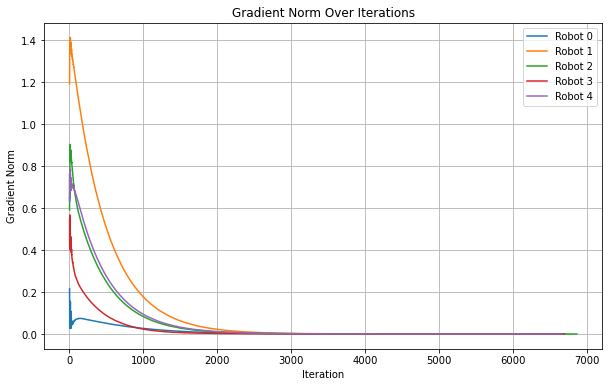

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
for i in range(NUM_ROBOTS):
    robot_df = df[df['robot_id'] == i]
    grad_est_norm = np.array([np.linalg.norm(grad) for grad in robot_df['grad_est']])
    plt.plot(robot_df['iteration'].to_numpy(), grad_est_norm, label=f'Robot {i}')
plt.xlabel('Iteration')
plt.ylabel('Gradient Norm')
plt.title('Gradient Norm Over Iterations')
plt.grid()
plt.legend()
plt.show()